<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/B_practices/keras_example02_%E5%81%9A%E4%B8%AA%E7%AE%80%E5%8D%95%E7%9A%84%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E8%AE%AD%E7%BB%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ly:2022-10-29
#做个简单的非线性回归
#From: B站，人工智能前沿技术-2.3
# 模型导入：一般都会导入这几个层
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

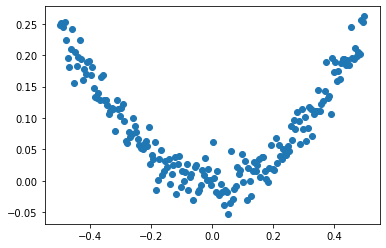

In [ ]:
#生成200个随机点
x_data = np.linspace(-0.5, 0.5, 200)
noice = np.random.normal(0, 0.02,x_data.shape)
y_data = np.square(x_data) + noice #开平方，这样就是非线性的

#显示随机点
plt.scatter(x_data, y_data)
plt.show()

### 明显这个是非线性的，那么用上节课的线性肯定是不能拟合的
我们先尝试来拟合一下

loss: 0.19797290861606598
loss: 0.04043830558657646
loss: 0.01251885388046503
loss: 0.00734048942103982
loss: 0.006380033679306507
loss: 0.006201893091201782
loss: 0.006168851628899574
w: [[0.00107742]] b: [0.08369752]
7/7 [==============================] - 0s 2ms/step


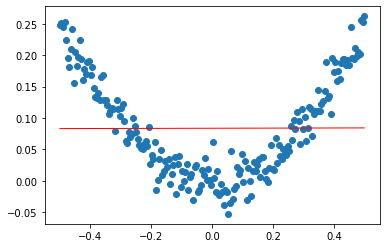

In [ ]:
model = Sequential()
model.add(Dense(units=1, input_dim=1)) #在模型中添加一个全连接层

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练300个批次
for step in range(3001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**可以发现损失(loss)到达约0.006后，基本就没怎么变化了，而且拟合也是不好的  
我们接下来添加非线性拟合

In [ ]:
model = Sequential()
# model.add(Dense(units=1, input_dim=1)) #这只有一个输入单元（神经元），一个输出单元（神经元），太简单了，就不能拟合复杂的，因此我们需要多加一些神经元和隐藏层
#输入1，中间层（隐藏层）10
model.add(Dense(units=10, input_dim=1)) #这同时意味着这里的输出也会是10
#输出层1
model.add(Dense(units=1)) #等同于model.add(Dense(units=1, input_dim=10))这个input_dim=10其实就是自动承接的上一层的输出

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练300个批次
for step in range(3001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()